In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-06-03 07:20:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   151MB/s    in 0.9s    

2020-06-03 07:20:44 (151 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-06-03 07:20:45--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/z

Extract Files for Horses or Humans directory

In [0]:
import os
import zipfile

local_zip='/tmp/horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')

local_zip='/tmp/validation-horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

Creating sub-directories for Horses and humans in both Testing and Validation sets

In [0]:
train_dir='/tmp/horse-or-human'
validation_dir='/tmp/validation-horse-or-human'

train_horse_dir=os.path.join(train_dir,'horses')
train_human_dir=os.path.join(train_dir,'humans')

test_horse_dir=os.path.join(validation_dir,'horses')
test_human_dir=os.path.join(validation_dir,'humans')


Starting with the model

In [0]:
import tensorflow as tf

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])



Compile the model

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=.2,
                                    horizontal_flip=True,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator=training_datagen.flow_from_directory(train_dir,
                                             target_size=(150,150),
                                             batch_size=128,
                                             class_mode='binary')
validation_data=validation_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=32,
                                                       class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [9]:
history=model.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=8,
    verbose=1,
    validation_data=validation_data,
    validation_steps=8
)

Epoch 1/100
8/8 [==============================] - 25s 3s/step - loss: 0.7082 - accuracy: 0.4983 - val_loss: 0.6840 - val_accuracy: 0.5781
Epoch 2/100
8/8 [==============================] - 25s 3s/step - loss: 0.6977 - accuracy: 0.5806 - val_loss: 0.6749 - val_accuracy: 0.5000
Epoch 3/100
8/8 [==============================] - 26s 3s/step - loss: 0.6680 - accuracy: 0.6263 - val_loss: 0.6428 - val_accuracy: 0.6406
Epoch 4/100
8/8 [==============================] - 24s 3s/step - loss: 0.7634 - accuracy: 0.6941 - val_loss: 1.1512 - val_accuracy: 0.5000
Epoch 5/100
8/8 [==============================] - 24s 3s/step - loss: 0.7638 - accuracy: 0.6618 - val_loss: 0.6176 - val_accuracy: 0.5273
Epoch 6/100
8/8 [==============================] - 24s 3s/step - loss: 0.5859 - accuracy: 0.6908 - val_loss: 0.6945 - val_accuracy: 0.5234
Epoch 7/100
8/8 [==============================] - 25s 3s/step - loss: 0.5077 - accuracy: 0.7675 - val_loss: 2.0107 - val_accuracy: 0.5000
Epoch 8/100
8/8 [==========

Plotting The Model

<Figure size 432x288 with 0 Axes>

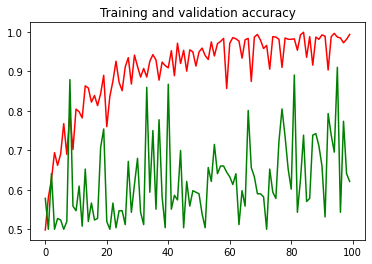

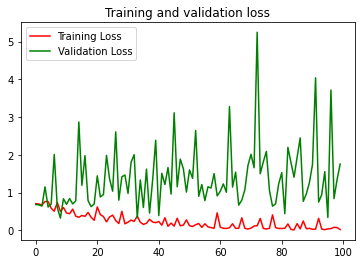

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch=range(len(acc))

plt.plot(epoch,acc,'r',label='Training Accuracy')
plt.plot(epoch,val_acc,'g',label='Validation Accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epoch,loss,'r',label='Training Loss')
plt.plot(epoch,val_loss,'g',label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

Testing The Model

In [0]:
from google.colab import files
import numpy as np
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/'+fn
  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")